<a href="https://colab.research.google.com/github/shanecandoit/tweet_emotion/blob/main/Copy_of_Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
dataset = nlp.load_dataset('emotion')

Using custom data configuration default


In [4]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [5]:
train=dataset['train']
val=dataset['validation']
test=dataset['test']
train.shape, val.shape, test.shape

((16000, 2), (2000, 2), (2000, 2))

In [6]:
train[0]

{'label': 'sadness', 'text': 'i didnt feel humiliated'}

In [7]:
def get_tweets(data):
  texts = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return texts, labels

In [8]:
tweets, labels = get_tweets(train)
for i in range(5):
  print(tweets[i],'\n=', labels[i])

i didnt feel humiliated 
= sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake 
= sadness
im grabbing a minute to post i feel greedy wrong 
= anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property 
= love
i am feeling grouchy 
= anger


## Task 4: Tokenizer

1. Tokenizing the tweets

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer(num_words=10_000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)
tokenizer

In [11]:
tokenizer.texts_to_sequences([tweets[0]]), tweets[0]

([[2, 139, 3, 679]], 'i didnt feel humiliated')

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

In [12]:
lengths = [len(t.split(' ')) for t in tweets]
min(lengths), max(lengths)

(2, 66)

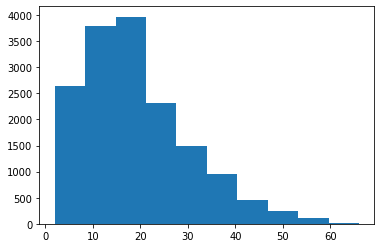

In [13]:
plt.hist(lengths,)# bins=len(set(lengths)))
plt.show()

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
maxlen = 50

In [16]:
def get_seqs(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [17]:
padded_train = get_seqs(tokenizer, tweets)
padded_train[:3]

array([[   2,  139,    3,  679,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   2,   40,  101,   60,    8,   15,  494,    5,   15, 3496,  553,
          32,   60,   61,  128,  148,   76, 1480,    4,   22, 1255,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  17, 3060,    7, 1149,    5,  286,    2,    3,  495,  438,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [18]:
classes = sorted(list(set(labels)))
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

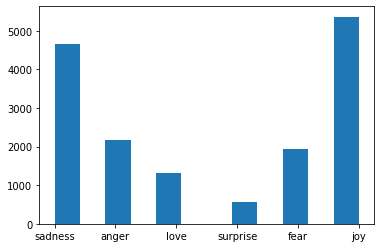

In [19]:
plt.hist(labels, bins=len(classes)*2)
plt.show()

In [20]:
class_to_index = {i:c for c,i in enumerate(classes)}
class_to_index

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}

In [21]:
index_to_class = {v:k for k,v in class_to_index.items()}
index_to_class

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

In [22]:
labels[:9]

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy']

In [23]:
#names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])
def names_to_ids(labels):
  idxs = [class_to_index[x] for x in labels]
  #print(idxs)
  return np.array(idxs)


In [24]:
train_labels = names_to_ids(labels)
train_labels[:5]

array([4, 4, 0, 3, 0])

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential([
                    Embedding(10_000, 16, input_length=maxlen),
                    Bidirectional(LSTM(20, return_sequences=True)),
                    Bidirectional(LSTM(20)),
                    Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [28]:
val_tweets, val_labels = get_tweets(val)
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness')

In [29]:
val_seqs = get_seqs(tokenizer, val_tweets)
val_seqs[:3]

array([[  17,    8,  157,  260,    4,  343,   16,   51,   19,  212,    1,
          50,   10,   13,  533,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   2,    3,   14,    2,   24,   72,  253,   33,    7,  618, 2743,
         618, 1418,   10, 1104,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   2,    3,   14,    7,  614,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [30]:
val_labels = names_to_ids(val_labels)
val_labels[:3]

array([4, 4, 3])

In [31]:
val_tweets[0], val_labels[0], index_to_class[val_labels[0]]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 4,
 'sadness')

In [32]:
h = model.fit(padded_train,
              train_labels,
              validation_data=(val_seqs, val_labels),
              epochs=20,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                          patience=2)])

Epoch 1/20
500/500 [==============================] - 43s 60ms/step - loss: 1.3281 - accuracy: 0.4686 - val_loss: 0.8800 - val_accuracy: 0.6400
Epoch 2/20
500/500 [==============================] - 28s 57ms/step - loss: 0.6271 - accuracy: 0.7757 - val_loss: 0.5918 - val_accuracy: 0.8035
Epoch 3/20
500/500 [==============================] - 29s 57ms/step - loss: 0.3624 - accuracy: 0.8798 - val_loss: 0.5090 - val_accuracy: 0.8330
Epoch 4/20
500/500 [==============================] - 28s 57ms/step - loss: 0.2655 - accuracy: 0.9109 - val_loss: 0.4570 - val_accuracy: 0.8520
Epoch 5/20
500/500 [==============================] - 28s 56ms/step - loss: 0.2111 - accuracy: 0.9308 - val_loss: 0.4523 - val_accuracy: 0.8650
Epoch 6/20
500/500 [==============================] - 28s 57ms/step - loss: 0.1602 - accuracy: 0.9466 - val_loss: 0.4038 - val_accuracy: 0.8780
Epoch 7/20
500/500 [==============================] - 29s 57ms/step - loss: 0.1321 - accuracy: 0.9564 - val_loss: 0.4188 - val_accuracy:

In [33]:
model.save('emotion')

INFO:tensorflow:Assets written to: emotion/assets


INFO:tensorflow:Assets written to: emotion/assets


In [34]:
!ls -lh emotion

total 4.2M
drwxr-xr-x 2 root root 4.0K Apr 13 17:50 assets
-rw-r--r-- 1 root root  23K Apr 13 19:16 keras_metadata.pb
-rw-r--r-- 1 root root 4.2M Apr 13 19:16 saved_model.pb
drwxr-xr-x 2 root root 4.0K Apr 13 19:16 variables


## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

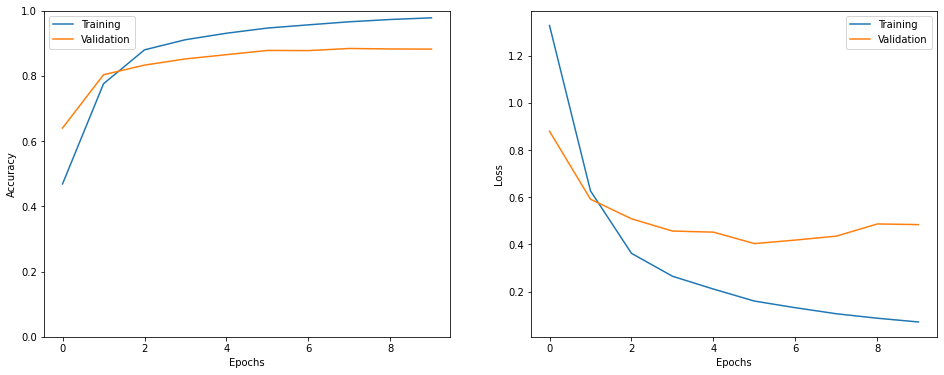

In [35]:
show_history(h)

In [36]:
test_tweets, test_labels = get_tweets(test)
test_seqs = get_seqs(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)
test_seqs[:3], test_labels[:3]

(array([[  17,    8,  203,  715,   15,   17,   26,   46, 5595,  114,   58,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [  17,    1,   11,  243,   37,    2,    3,  469,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [   2,  145,   80,   68, 2971,   60,   18,   37,    2,  104,   43,
          165,   67,   68,    5,    3,   14,    2,   93,  406,   25,   68,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

In [37]:
_ = model.evaluate(test_seqs, test_labels)

63/63 [==============================] - 1s 20ms/step - loss: 0.4454 - accuracy: 0.8855


In [39]:
ri = random.randint(0, len(test_labels)-1)
print('text:', test_tweets[ri])
print('emotion:',index_to_class[test_labels[ri]])

p = model.predict(np.expand_dims(test_seqs[ri], axis=0))[0]
#print(p)
#print(np.argmax(p).astype('uint8'))
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('predicted emotion:', pred_class)

text: i feel very glad that finland s well known visual artist vesa kivinen had called me to work with him
emotion: joy
predicted emotion: joy


In [40]:
preds = model.predict(test_seqs)
preds[:3]

array([[5.3437601e-05, 1.3775818e-04, 5.0045300e-04, 2.3412636e-06,
        9.9930131e-01, 4.6082191e-06],
       [1.1040812e-04, 1.4068747e-04, 6.9764274e-04, 6.3507732e-06,
        9.9903655e-01, 8.2818960e-06],
       [2.3266915e-04, 4.0700633e-04, 1.2912998e-03, 1.7250766e-05,
        9.9803668e-01, 1.5093929e-05]], dtype=float32)

In [41]:
# https://stackoverflow.com/questions/68883510/attributeerror-sequential-object-has-no-attribute-predict-classes
pred_classes = [np.argmax(p) for p in preds]
pred_classes[:3]

[4, 4, 4]

In [42]:
test_labels, preds, classes

(array([4, 4, 4, ..., 2, 2, 1]),
 array([[5.3437601e-05, 1.3775818e-04, 5.0045300e-04, 2.3412636e-06,
         9.9930131e-01, 4.6082191e-06],
        [1.1040812e-04, 1.4068747e-04, 6.9764274e-04, 6.3507732e-06,
         9.9903655e-01, 8.2818960e-06],
        [2.3266915e-04, 4.0700633e-04, 1.2912998e-03, 1.7250766e-05,
         9.9803668e-01, 1.5093929e-05],
        ...,
        [5.7535917e-06, 1.5243269e-05, 9.9954802e-01, 2.0398323e-04,
         2.2395719e-04, 2.9947412e-06],
        [5.1393172e-06, 1.1024529e-05, 9.9963987e-01, 2.1398377e-04,
         1.2702710e-04, 2.8141130e-06],
        [2.7145093e-02, 4.1656557e-02, 2.2515282e-04, 1.6364462e-04,
         1.1855655e-03, 9.2962396e-01]], dtype=float32),
 ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

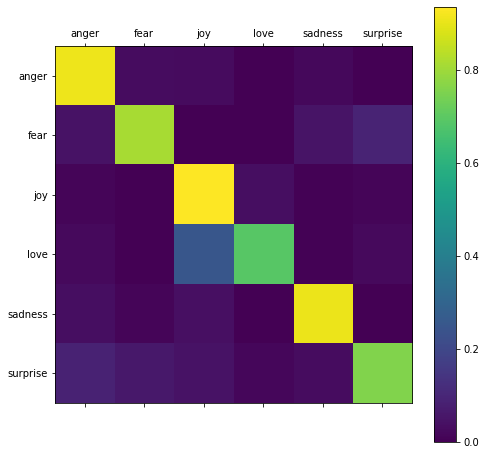

In [43]:
show_confusion_matrix(test_labels, pred_classes, classes)